# Bank Marketing Dataset

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Attribute Information

Attribute Information:
Input variables:

**bank client data:

1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>

**related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')<br> 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target<br>(e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

**social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br> 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

**Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [18]:
# Library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data load and Checks

In [19]:
# Load the dataset (the separator here is ';')

bank = pd.read_csv("D:\\ML-Datasets\\UCI-Datasets\\bank-additional-full.csv", sep=";")

# Check the initial rows
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
# Lets check for missing values

sum(bank.isna().sum())

0

In [21]:
# Check the data structure
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [22]:
# Convert the object columns to categorical

bank['job'] = pd.Categorical(bank['job'])
bank['marital'] = pd.Categorical(bank['marital'])
bank['education'] = pd.Categorical(bank['education'])
bank['default'] = pd.Categorical(bank['default'])
bank['housing'] = pd.Categorical(bank['housing'])
bank['loan'] = pd.Categorical(bank['loan'])
bank['contact'] = pd.Categorical(bank['contact'])
bank['month'] = pd.Categorical(bank['month'])
bank['day_of_week'] = pd.Categorical(bank['day_of_week'])
bank['poutcome'] = pd.Categorical(bank['poutcome'])
bank['y'] = pd.Categorical(bank['y'])

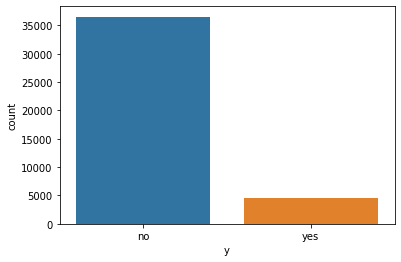

In [23]:
# Check the distribution of the response variable
sns.countplot(bank['y'])

## Prediction using Random Forests

In [32]:
# We will create a separate dataset for this analysis

dataset = bank.copy()

In [33]:
# In order to use scikit-learn RFC, the categorical columns has to be converted to numeric attribues

# We will convert the response variable as numeric
replace_map = {'y':{'no': 0, 'yes': 1 }, 
               'job':{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 
                                                'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9,
                                                'unemployed': 10,'unknown': 11},
              'marital':{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3},
              'education':{'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3, 'illiterate': 4, 'professional.course': 5, 
                           'university.degree': 6, 'unknown': 7},
              'default':{'no': 0, 'yes': 1, 'unknown': 2},
              'housing':{'no': 0, 'yes': 1, 'unknown': 2},
              'loan':{'no': 0, 'yes': 1, 'unknown': 2},
              'contact':{'cellular': 0, 'telephone': 1},
              'month':{'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9,
                      'nov': 10, 'dec': 11},
              'day_of_week':{'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4, 'sat': 5, 'sun': 6},
              'poutcome':{'failure': 0, 'nonexistent': 1, 'success': 2}}

dataset.replace(replace_map, inplace=True)

# Check the data frame now for the changes
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,4,0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,2,0,0,1,4,0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,4,0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,4,0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,4,0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [34]:
# We will shuffle the dataset and reset the index
from sklearn.utils import shuffle

dataset = shuffle(dataset)
dataset.reset_index(inplace=True, drop=True)
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,33,0,1,6,0,0,0,0,7,3,...,1,999,0,1,-1.7,94.027,-38.3,0.899,4991.6,1
1,51,5,1,6,0,1,1,1,4,1,...,5,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,43,4,1,7,2,0,0,0,3,3,...,1,999,0,1,-1.8,93.075,-47.1,1.410,5099.1,0
3,32,9,1,6,0,1,0,0,7,1,...,3,999,0,1,1.4,93.444,-36.1,4.968,5228.1,0
4,42,6,1,5,2,2,2,0,4,4,...,1,999,0,1,-1.8,92.893,-46.2,1.250,5099.1,0


In [35]:
# Train , test split
features = dataset.drop('y', axis=1)
target = dataset['y']

from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, 
                                                                           random_state=101)

In [36]:
# Train the model using the Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300)
model.fit(features_train, target_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Confusion Matrix
[[10635   360]
 [  641   721]]


Plotting the confusion matrix


Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     10995
           1       0.67      0.53      0.59      1362

    accuracy                           0.92     12357
   macro avg       0.81      0.75      0.77     12357
weighted avg       0.91      0.92      0.91     12357



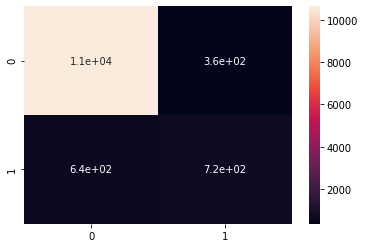

In [39]:
# Model evaluations

# predictions
predictions = model.predict(features_test)

from sklearn.metrics import classification_report, confusion_matrix
print(f'Confusion Matrix')
print(confusion_matrix(target_test, predictions))
print("\n")
print(f'Plotting the confusion matrix')
sns.heatmap(confusion_matrix(target_test, predictions), annot=True)
print("\n")
print(f'Classification Report')
print(classification_report(target_test, predictions))
